In [10]:
import os
import pandas as pd
import ROOT
from array import array
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from tableauColors import palette

In [11]:
DATA_DIR = '/groups/hep/mojen/repositories/DREAM/Run/final_run/tauolaevts/25000'
# DATA_DIR = '/home/jupyter/DREAM'

fileName = os.path.join(DATA_DIR, 'dfmerged2.csv')
df = pd.read_csv(fileName)
print(df.shape)
df.head()

(11961, 17)


,eventId,clusterId,PrimaryDecayMode,VecShowerEnergy,S_sum,C_sum,S_rad_mean,C_rad_mean,S_hot,C_hot,CoverS,rec_energy,label,comi,comj,predictedLabel,predictedEnergy
0,1,1,4,13397.354239,6514.8620,4275.6553,4.649778,3.531102,0.071061,0.058091,0.656293,7375.418953,3,124.308455,127.515362,3,15232.819549
1,1,2,4,10115.048809,10436.0700,7992.4590,2.342874,1.656479,0.261235,0.188679,0.765850,11375.182248,2,135.292237,180.123139,2,11212.475262
2,1,3,4,4740.947309,5031.9375,4133.7246,2.474634,2.093701,0.116771,0.190987,0.821498,5377.132679,2,150.901608,175.728179,2,5538.377130
3,1,4,4,11594.263998,10662.7920,11079.4470,2.513136,1.768877,0.180327,0.168935,1.039076,10502.665935,2,138.046102,156.708211,2,11999.057493
4,1,5,4,2466.543425,1842.5836,1791.8718,2.239413,1.640046,0.152792,0.247525,0.972478,1862.072820,2,157.373335,147.430044,2,2427.241780


In [12]:
df.rec_energy.isna().sum(), df.predictedEnergy.isna().sum()

(0, 0)

In [13]:
np.mean(np.abs((df.VecShowerEnergy.values - df.rec_energy.values) / df.VecShowerEnergy.values)) * 100

37.90270674895322

In [14]:
np.mean(np.abs((df.VecShowerEnergy.values - df.predictedEnergy.values) / df.VecShowerEnergy.values)) * 100

31.423197384217165

In [28]:
f = ROOT.TFile('dfmerged2.root', 'recreate' )
t = ROOT.TTree('dfmerged2', 'tree with dfmerged set' )

PrimaryDecayMode = array('i', [0])
VecShowerEnergy = array('d', [0.])
S_sum = array('d', [0.])
C_sum = array('d', [0.])
S_rad_mean = array('d', [0.])
C_rad_mean = array('d', [0.])
S_hot = array('d', [0.])
C_hot = array('d', [0.])
CoverS = array('d', [0.])
# dist2charge = array('d', [0.])
rec_energy = array('d', [0.])
predictedEnergy = array('d', [0.])
label = array('i', [0])

t.Branch('PrimaryDecayMode', PrimaryDecayMode, "PrimaryDecayMode/I")
t.Branch('VecShowerEnergy', VecShowerEnergy, "VecShowerEnergy/D")
t.Branch('S_sum', S_sum, "S_sum/D")
t.Branch('C_sum', C_sum, "C_sum/D")
t.Branch('S_rad_mean', S_rad_mean, "S_rad_mean/D")
t.Branch('C_rad_mean', C_rad_mean, "C_rad_mean/D")
t.Branch('S_hot', S_hot, "S_hot/D")
t.Branch('C_hot', C_hot, "C_hot/D")
t.Branch('CoverS', CoverS, "CoverS/D")
# t.Branch('dist2charge', dist2charge, "dist2charge/D")
t.Branch('rec_energy', rec_energy, "rec_energy/D")
t.Branch('predictedEnergy', predictedEnergy, "predictedEnergy/D")
t.Branch('label', label, "label/I")

for i in range(df.shape[0]):
    PrimaryDecayMode[0] = df.PrimaryDecayMode.values[i] 
    VecShowerEnergy[0] = df.VecShowerEnergy.values[i]
    S_sum[0] = df.S_sum.values[i]
    C_sum[0] = df.C_sum.values[i]
    S_rad_mean[0] = df.S_rad_mean.values[i]
    C_rad_mean[0] = df.C_rad_mean.values[i]
    S_hot[0] = df.S_hot.values[i]
    C_hot[0] = df.C_hot.values[i]
    CoverS[0] = df.CoverS.values[i]
    rec_energy[0] = df.rec_energy.values[i]
    predictedEnergy[0] = df.predictedEnergy.values[i]
#     dist2charge[0] = df.dist2charge.values[i]
    label[0] = df.label.values[i]
    t.Fill()
f.Write()
f.Close()

In [29]:
tdf = ROOT.ROOT.RDataFrame("dfmerged2", "dfmerged2.root")

In [30]:
tdf.AsNumpy()

{'PrimaryDecayMode': numpy.array([4, 4, 4, ..., 3, 3, 3], dtype=int32),
 'VecShowerEnergy': numpy.array([13397.35423879, 10115.04880914,  4740.94730948, ...,
               1257.49764143,  2065.98916585,  8043.50768716]),
 'S_sum': numpy.array([ 6514.862 , 10436.07  ,  5031.9375, ...,  1061.226 ,
               1842.0273,  2779.7263]),
 'C_sum': numpy.array([4275.6553, 7992.459 , 4133.7246, ..., 1224.148 , 2102.3413,
                 0.    ]),
 'S_rad_mean': numpy.array([4.6497784, 2.342874 , 2.474634 , ..., 1.792903 , 2.3477807,
              3.3129146]),
 'C_rad_mean': numpy.array([3.5311024, 1.6564791, 2.0937006, ..., 1.4453987, 2.1461353,
                    nan]),
 'S_hot': numpy.array([0.07106068, 0.26123473, 0.11677091, ..., 0.12734538,
              0.16274647, 0.08721894]),
 'C_hot': numpy.array([0.05809128, 0.18867925, 0.19098713, ..., 0.2246377 ,
              0.17299578,        nan]),
 'CoverS': numpy.array([0.65629254, 0.7658495 , 0.8214976 , ..., 1.15352244,
             

In [108]:
tdf2 = tdf
tdf2 = tdf2.Define("rec_percentage_error", "(VecShowerEnergy-rec_energy)/VecShowerEnergy * 100")
tdf2 = tdf2.Define("pred_percentage_error", "(VecShowerEnergy-predictedEnergy)/VecShowerEnergy * 100")

0 9000
9000 18000
18000 27000
27000 36000
36000 45000
0 9000
9000 18000
18000 27000
27000 36000
36000 45000
0 9000
9000 18000
18000 27000
27000 36000
36000 45000
0 9000
9000 18000
18000 27000
27000 36000
36000 45000
0 9000
9000 18000
18000 27000
27000 36000
36000 45000
0 9000
9000 18000
18000 27000
27000 36000
36000 45000
0 9000
9000 18000
18000 27000
27000 36000
36000 45000
0 9000
9000 18000
18000 27000
27000 36000
36000 45000
 FCN=29.0025 FROM MINOS     STATUS=SUCCESSFUL     42 CALLS         280 TOTAL
                     EDM=7.67151e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.01650e+01   2.72381e+00  -1.92067e-02   9.19315e-05
   2  Mean         1.68359e+01   4.91555e-01   9.08294e-04   1.93966e-03
   3  Sigma        9.15866e+00   4.17893e-01   4.17893e-01   6.41664e-03
 FCN=36.7187 FROM MINOS     STATUS=SUCCESSFUL   

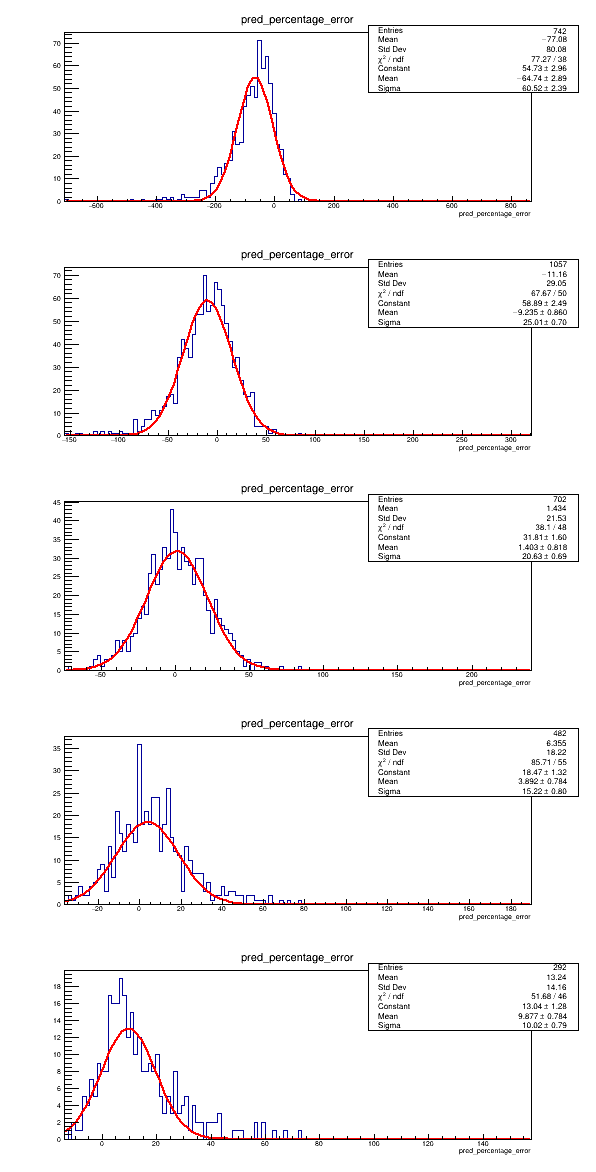

In [109]:
import copy
c1 = ROOT.TCanvas("c1", "c1", 600, 1200)
nbins = 5
c1.Divide(1,nbins)
binwidth = 9000

d = {k: np.zeros(nbins) for k in ['Energy', 'EnergyRes', 'EnergyResErr']}
d2 = {'e': copy.deepcopy(d), 'mu': copy.deepcopy(d), 'gamma': copy.deepcopy(d), 'pi': copy.deepcopy(d)}
data = {'rec_percentage_error': copy.deepcopy(d2), 'pred_percentage_error': copy.deepcopy(d2)}
s = 'pi'

for col in ['rec_percentage_error', 'pred_percentage_error']:
    for j,s in enumerate(['e', 'mu', 'gamma', 'pi']):
        tdf3 = tdf2.Filter(f"label == {j}")
        for i in range(nbins):
            c1.cd(i+1)
            print(i*binwidth, (i+1)*binwidth)
            tdf4 = tdf3.Filter(f"VecShowerEnergy > {i*binwidth} and VecShowerEnergy <= {(i+1)*binwidth}")
        #     model = ("", "", 50, -2., 2.)
            h = tdf4.Histo1D(col)
            r = h.Fit("gaus", "SEM+")
            h.DrawCopy()
            data[col][s]['Energy'][i] = (i+0.5)*binwidth
            data[col][s]['EnergyRes'][i] = r.Parameter(2)
            data[col][s]['EnergyResErr'][i] = r.ParError(2)

c1.Draw()

In [110]:
data

{'rec_percentage_error': {'e': {'Energy': array([ 4500., 13500., 22500., 31500., 40500.]),
   'EnergyRes': array([ 9.15865508,  6.17075991,  4.86367539,  7.24794818, 10.71411713]),
   'EnergyResErr': array([0.41789277, 0.28571994, 0.2615679 , 1.02800396, 6.17425658])},
  'mu': {'Energy': array([ 4500., 13500., 22500., 31500., 40500.]),
   'EnergyRes': array([27.31516633,  7.04579921,  3.97719633,  3.55479553,  1.83190813]),
   'EnergyResErr': array([6.15493198, 0.43566825, 0.27113582, 0.39191953, 0.20107615])},
  'gamma': {'Energy': array([ 4500., 13500., 22500., 31500., 40500.]),
   'EnergyRes': array([19.27513068,  8.12041472,  7.69369739, 27.10292639, 71.08681359]),
   'EnergyResErr': array([ 0.45448085,  0.23678367,  0.50636345, 18.49021469, 66.52358252])},
  'pi': {'Energy': array([ 4500., 13500., 22500., 31500., 40500.]),
   'EnergyRes': array([16.85080808, 17.60584587, 17.47080348, 15.52750955, 16.5715403 ]),
   'EnergyResErr': array([0.92010467, 0.54002519, 0.62897682, 0.788556

 FCN=7.07596 FROM MINOS     STATUS=SUCCESSFUL     65 CALLS        1447 TOTAL
                     EDM=1.6837e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.80320e+02   1.67673e+02   2.38895e+00  -4.56309e-06
   2  p1           7.56726e-01   1.01607e+00   1.01607e+00   1.66981e-09
 FCN=1.8875 FROM MINOS     STATUS=SUCCESSFUL     63 CALLS        1422 TOTAL
                     EDM=1.14757e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.55866e+03   2.76802e+03   2.65192e+01  -2.66880e-07
   2  p1          -1.38124e+01   1.71107e+01   1.71107e+01   9.68936e-11
 FCN=4.88623 FROM MINOS     STATUS=SUCCESSFUL     77 CALLS        1468 TOTAL
                     EDM=1.1858

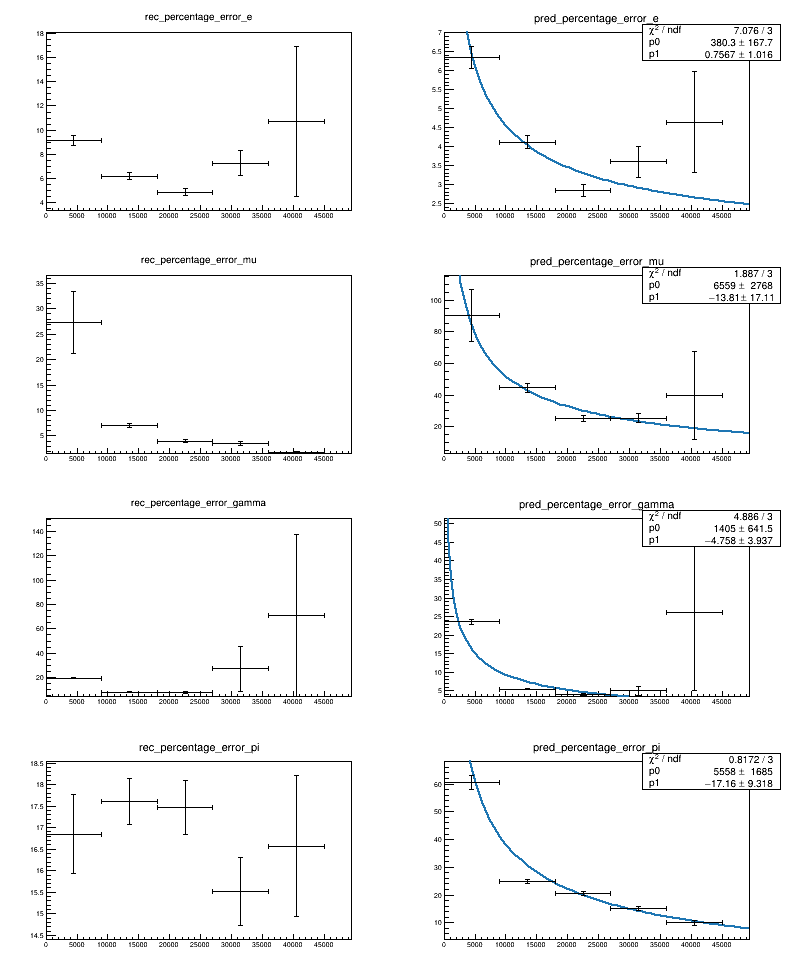

In [111]:
ROOT.gStyle.SetOptStat("emr")
ROOT.gStyle.SetOptFit(1)

c2 = ROOT.TCanvas("c2", "c2", 800, 1000)
c2.Divide(2,4)
c2.SetLeftMargin(.12)
c2.SetBottomMargin(.12)
c2.SetRightMargin(.12)
c2.SetTopMargin(.12)

f1 = ROOT.TF1("f1","[0]/sqrt(x)+[1]")
f1.SetLineColor(palette['blue'].GetNumber())
gr = [None, None, None, None, None, None, None, None]

for i,col in enumerate(['rec_percentage_error', 'pred_percentage_error']):
    for j,s in enumerate(['e', 'mu', 'gamma', 'pi']):
        idx = 2*j+i
        c2.cd(idx+1)
        x = array('f', data[col][s]['Energy'])
        n = len(x)
        y = array('f', data[col][s]['EnergyRes'])
        ex = array('f', [0.5*binwidth]*n)
        ey = array('f', data[col][s]['EnergyResErr'])
        gr[idx] = ROOT.TGraphErrors(n, x, y, ex, ey)
        gr[idx].SetTitle(col + "_" + s)
        if i == 1:
            gr[idx].Fit(f1, "SEM+")
#         gr.SetMarkerStyle(marker[i])
    
        gr[idx].Draw('ap')

c2.Update()

labelsize = 0.03
titlesize = 0.04
titleoffset = 1.2
labeloffset = 0.005
linewidth = 3
ticklength = 0.02

# mg.GetXaxis().SetTitle("E_{true} [GeV]")
# mg.GetYaxis().SetTitle("#sigma/E_{reconstructed} [%]")
# mg.SetMinimum(0.)
# # mg.SetMaximum(16.)
# mg.GetXaxis().SetTickLength(ticklength)
# mg.GetYaxis().SetTickLength(ticklength)
# mg.GetXaxis().SetTitleSize(titlesize)
# mg.GetYaxis().SetTitleSize(titlesize)
# mg.GetXaxis().SetLabelSize(labelsize)
# mg.GetYaxis().SetLabelSize(labelsize)
# mg.GetXaxis().CenterTitle()
# mg.GetYaxis().CenterTitle()
# mg.GetXaxis().SetTitleOffset(titleoffset)
# mg.GetYaxis().SetTitleOffset(titleoffset)
# mg.GetXaxis().SetLabelOffset(labeloffset)
# mg.GetYaxis().SetLabelOffset(labeloffset)

# stats1 = gr[0].GetListOfFunctions().FindObject("stats")
# # stats2 = gr[1].GetListOfFunctions().FindObject("stats")
# stats1.SetTextColor(palette['blue'].GetNumber())
# # stats2.SetTextColor(palette['red'].GetNumber())
# stats1.SetX2NDC(1-c2.GetRightMargin()); stats1.SetX1NDC(stats1.GetX2NDC()-0.4)
# stats1.SetY2NDC(1-c2.GetTopMargin()-0.016); stats1.SetY1NDC(stats1.GetY2NDC()-0.12)
# # stats2.SetX2NDC(stats1.GetX2NDC()); stats2.SetX1NDC(stats1.GetX1NDC())
# # stats2.SetY2NDC(stats1.GetY1NDC()); stats2.SetY1NDC(stats2.GetY2NDC()-0.12)
# stats1.SetTextSize(labelsize)
# # stats2.SetTextSize(labelsize)
# stats1.SetBorderSize(0)
# # stats2.SetBorderSize(0)

# # add legend
# # x1 = c2.GetLeftMargin() + 0.03
# # x2 = x1 + 0.25
# # y2 = 1 - c2.GetTopMargin() - 0.03 - 0.01
# # y1 = y2 - 0.08
# # legend = ROOT.TLegend(x1, y1, x2, y2)
# # legend.SetFillColor(0)
# # legend.SetBorderSize(0)
# # legend.SetTextSize(labelsize)
# # # legend.AddEntry(gr[0], "electron", "p")
# # # legend.AddEntry(gr[1], "pion", "p")
# # legend.Draw()

c2.Modified()
c2.Print("energyres.png")
c2.Draw()